<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/5.%20%EB%94%A5%EB%9F%AC%EB%8B%9D(deep%20learning)/1.%20Activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화 함수(Activation function)

<참고>
- https://bbangko.tistory.com/5 
- https://ynebula.tistory.com/42 
- https://hackmd.io/@Xg9_wrttQju8FXRCNT-Baw/BJn78zHAr 
- https://m.blog.naver.com/PostView.nhn?blogId=handuelly&logNo=221824080339&proxyReferer=https:%2F%2Fwww.google.com%2F

## 계단함수 (Step function)
- 0보다 큰 경우 1 출력, 0보다 작은 경우 0 출력 (Binary)
- 직관적이다.
- 모델 Optimization 과정에서 미분을 해야하는데 계단함수는 미분이 되지 않아 딥러닝 모델에는 사용할 수 없음.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 샘플데이터
x = np.array([-1, 1, 2])

# 0 보다 클 경우 1
y = x>0
y = y.astype(np.int)
y

array([0, 1, 1])

In [ ]:
def step_function(x) :
  return np.array(x>0, dtype=np.int)

print(step_function(-1))
print(step_function(0.5))
print(step_function(500000))

0
1
1


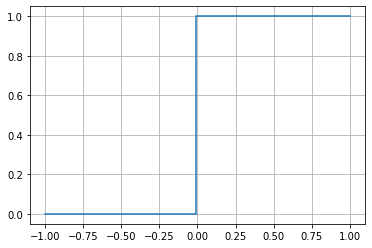

In [ ]:
# 그래프 그리기
x = np.linspace(-1, 1, 100) 
plt.step(x, step_function(x)) 
plt.grid(which='major')
plt.show() 

## 시그모이드 함수 (Sigmoid Function)
- 눕힌 s자 모양. (A′=A(1−A)) 로 미분이 간결하게 되어 코드로 구현하기 쉽고 입문 단계에서 꼭 다루는 함수이다.
- 시그모이드 함수를 미분하면 최대치가 0.25 -> 1보다 작아 계속 곱하면 0에 가까워짐
- x가 0일때 기울기가 최대가 된다. 그 미분값은 1/4이다.(최대치)
- 모든 실수 값을 0보다 크고 1보다 작은 미분 가능한 수로 변환하는 특징을 갖기 때문에, Logistic Classification과 같은 분류 문제에 많이 사용됨.
- 역전파 알고리즘에서 여러 층을 거칠수록 기울기가 작아져 처음 층까지 전달되지 않는 기울기 소실(vanishing gradient) 문제가 발생해 가중치를 수정하기 어려워짐.
- 1~2개 Layer에서는 사용할 수 있겠지만 Deep한 학습법에서는 비추.

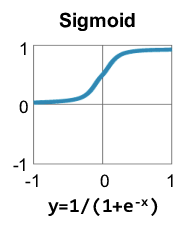

In [ ]:
def sigmoid(x) :
  return 1/(1+np.exp(-x))

x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


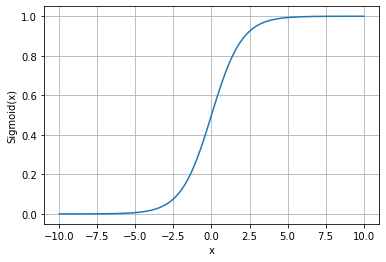

In [ ]:
x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(which='major')
plt.show()

- 시그모이드 도함수
  - 수학적 풀이(미분)
https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

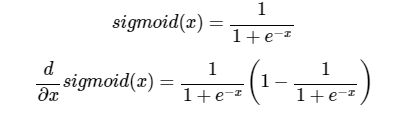

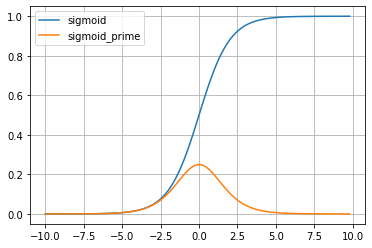

In [ ]:
# 시그모이드 함수의 도함수 유도
def sigmoid_prime(x):
  sig = sigmoid(x)
  return sig * (1 - sig)

# 시그모이드 함수, 도함수 그래프 생성
x_range = np.arange(-10, 10, 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid')
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.grid(which='major')
plt.legend()
plt.show()

## 하이퍼블릭 탄젠트 함수 (Tanh Function)
- sigmoid와 모양이 비슷하지만 그래프 위치와 기울기가 다름.
- sigmoid fuction을 보완하고자 나온 함수.
- 입력신호를 -1과 1 사이 값으로 normalization해준다.
- 거의 모든 방면에서 sigmoid보다 성능이 좋다.
- 기울기 최대인 x가 0인 지점의 미분값은 1이된다. 이것도 Gradient Vanishing 문제가 발생한다.(하지만 sigmoid 함수보다는 덜하다.)


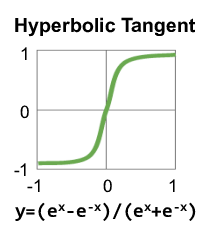

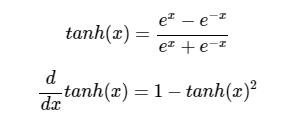

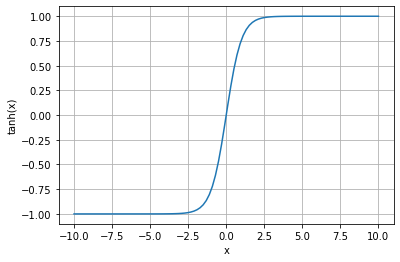

In [ ]:
def tanh(x) :
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

x = np.linspace(-10, 10, 100)

plt.plot(x, tanh(x))
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(which='major')
plt.show()

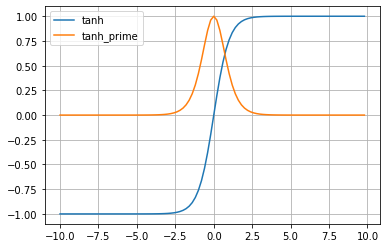

In [ ]:
# 탄젠트
def tanh_prime(x):
  tan = tanh(x)
  return 1-tan**2

# 하이퍼블릭 탄젠트 함수, 도함수 그래프 생성
x_range = np.arange(-10, 10, 0.2)
y_range = np.array([tanh(x) for x in x_range])
y_prime = np.array([tanh_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='tanh')
plt.plot(x_range, y_prime, label='tanh_prime')
plt.grid(which='major')
plt.legend()
plt.show()

- sigmoid와 tanh 모두 Gradient Vanishing 문제가 발생함.
- 비슷한 문제로 미분값이 1이상의 실수이면 Gradient Exploding 문제가 발생하는데 이것 또한 1이상의 실수가 n번 곱해져 발산해버린다.

## ReLU 함수 (Rectified Linear Unit)
- 토론토 제프리 힌튼 교수
- 시그모이드 함수의 대안으로 떠오르며 현재 가장 인기있는 활성화 함수
- x가 0보다 작을 때는 모든 값을 0으로 처리, 0보다 큰 값은 x 그대로 사용.
- 단순해보이지만 x가 0보다 크기만 하면 미분값이 1이 된다.
- 따라서 여러 은닉층을 거치며 곱해지더라도 맨 처음 층까지 사라지지 않고 남아있을 수 있다.
- 하지만 마지막의 결과 값을 출력하는 Output layer에서는 sigmoid 함수를 사용하게 된다. 0과 1 사이로 나와야 하기 때문에.
- exp() 함수를 사용하지 않아 sigmoid나 tanh보다 1.5배, 2배 빠르게 학습이 된다고 한다.
- Output으로 0이 많아 계산하는 시간과 메모리가 적은 장점이 있다. 또한 잠재적으로 overfitting을 막아준다고 한다. 같은 이유의 단점으로는 몇몇 가중치는 절대 업데이트 되지 않아 뉴런이 죽는 현상(Dying ReLU)이 발생한다.
- 경계가 없기에 가중치가 제대로 초기화되지 않은 경우 Gradient Exploding 문제가 생길 수 있음.
- 이후 ReLU의 0이 되는 순간을 완화한 softplus 함수 등 렐루를 변형한 함수도 개발됨

관련 문서 : https://towardsdatascience.com/neural-networks-an-alternative-to-relu-2e75ddaef95c

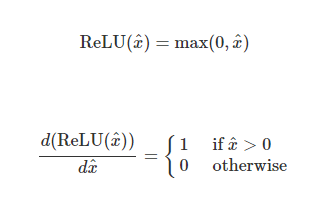

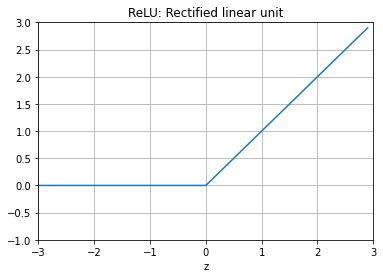

<Figure size 432x288 with 0 Axes>

In [ ]:
z = np.arange(-3, 3, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z,y);
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
ax.grid(True)
ax.set_xlabel('z');
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

In [ ]:
def rectified(x):
	return max(0.0, x)

# demonstrate with a positive input
x = 1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = 1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a zero input
x = 0.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a negative input
x = -1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = -1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

rectified(1.0) is 1.0
rectified(1000.0) is 1000.0
rectified(0.0) is 0.0
rectified(-1.0) is 0.0
rectified(-1000.0) is 0.0


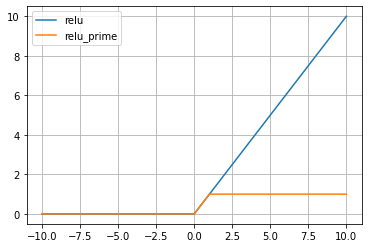

In [ ]:
# ReLU 도함수
def rectified_prime(x):
  if x>0:
    return 1
  else:
    return 0

x_range = np.arange(-10, 11)
y_range = np.array([rectified(x) for x in x_range])
y_prime = np.array([rectified_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='relu')
plt.plot(x_range, y_prime, label='relu_prime')
plt.grid(which='major')
plt.legend()
plt.show()

## Leaky ReLU (Leaky Rectified Linear Unit) + PReLU
- x가 음수인 경우 미분값이 0이 되지 않는다.
- ReLU의 Dying ReLU(뉴런이 죽는 현상)문제를 해결하기 위해 나온 함수.
- Gradient exploding 문제를 방지하진 않는다.
- ELU보다 계산이 더 효율적이다.
- PReLU(Parametric ReLU)는 음수에 대한 gradient를 변수(a)로 두고 학습을 통하여 업데이트 시키자는 컨셉.

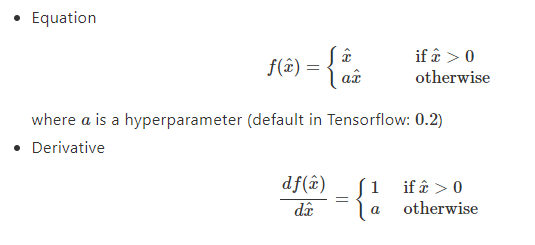

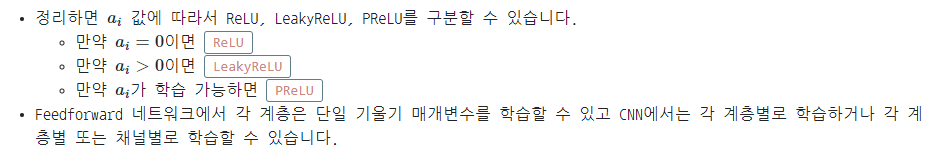

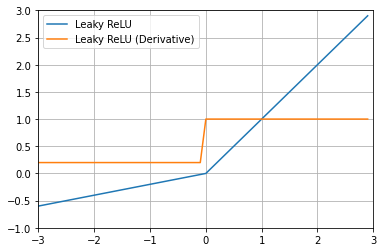

In [ ]:
# Leaky ReLU 함수 & 도함수

a=0.2 # parameter 조정가능(=PReLu)

def leaky_relu(x):
  if x>0:
    return x
  else:
    return a*x


def leaky_relu_prime(x):
  if x>0:
    return 1
  else:
    return a

# 하이퍼블릭 탄젠트 함수, 도함수 그래프 생성
x_range = np.arange(-3., 3., 0.1)
y_range = np.array([leaky_relu(x) for x in x_range])
y_prime = np.array([leaky_relu_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='Leaky ReLU')
plt.plot(x_range, y_prime, label='Leaky ReLU (Derivative)')
plt.ylim([-1.0, 3.0])
plt.xlim([-3.0, 3.0])
plt.grid(which='major')
plt.legend()
plt.show()

## ELU (Exponential Linear Unit)
- ReLU의 모든 장점을 포함하며 Dying ReLU 문제를 해결함.
- Gradient exploding 문제를 방지하진 않는다.
- 출력 값이 거의 ZERO-CENTERED에 가까우며, 일반적으로 ReLU와 다르게 지수 함수를 계산하는 비용이 발생한다.
(Zero-centered란 그래프의 중심 0인 형태로 함숫값이 양수 혹은 음수에만 치우치지 않고 실수 전체에서 나타나는 형태를 의미)
- Leaky ReLU보다 수렴이 빠르다.

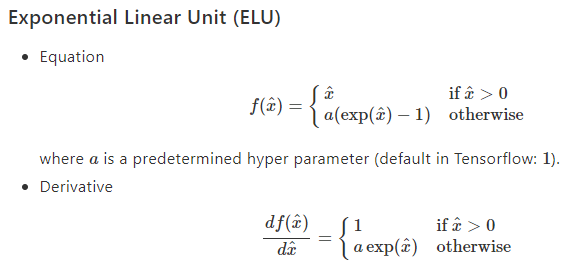

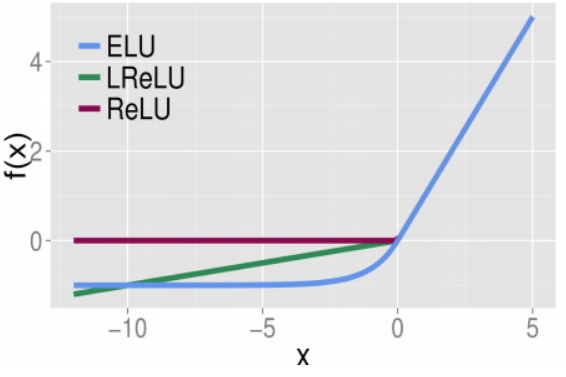

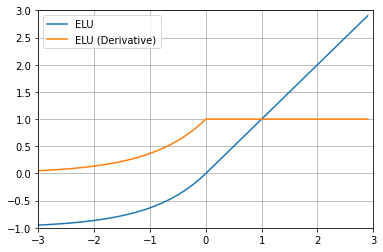

In [ ]:
# Leaky ReLU 함수 & 도함수

a=1 # parameter 조정가능

def elu(x):
  if x>0:
    return x
  else:
    return a*(np.exp(x)-1)


def elu_prime(x):
  if x>0:
    return 1
  else:
    return a*np.exp(x)

# 하이퍼블릭 탄젠트 함수, 도함수 그래프 생성
x_range = np.arange(-3., 3., 0.1)
y_range = np.array([elu(x) for x in x_range])
y_prime = np.array([elu_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='ELU')
plt.plot(x_range, y_prime, label='ELU (Derivative)')
plt.ylim([-1.0, 3.0])
plt.xlim([-3.0, 3.0])
plt.grid(which='major')
plt.legend()
plt.show()

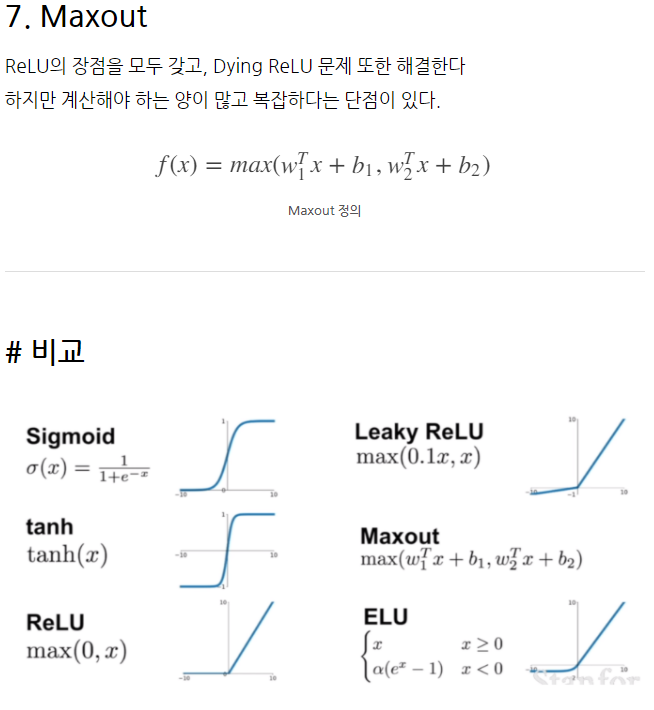

## 소프트맥스 함수 (Softmax Function)
- 다범주 분류기. 일반적으로 출력노드의 활성함수로 소프트맥스 함수를 사용함.
- 범주 수만큼의 차원을 갖는 입력벡터를 받아 확률로 변환해줌.(합이 1)
- 가장 큰 출력 값의 클래스가 확률이 가장 높은 것으로 이용됨.
- 벡터의 각 원소를 정규화하기 위해 입력 값을 모두 지수값으로 바꿈.(지수함수를 사용하면 가중치를 더 커지게 하는 효과가 있음.)
- 한 클래스의 근거(evidence)가 작을 때 그 클래스의 확률도 더 낮아짐.
- 자신의 가중합 뿐 아니라 다른 출력 노드들의 가중 합도 고려.
- 예측이 잘 이루어지지 않으면 여러 레이블이 비슷한 확률을 가지게 될 수도 있음.

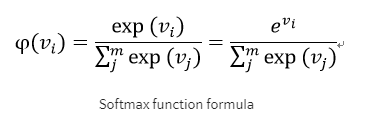

- i번째 출력 노드의 가중합 (1<=j<=m)
- m : 출력 노드의 개수

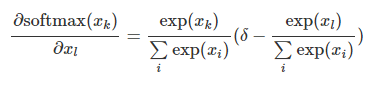

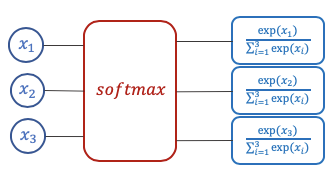

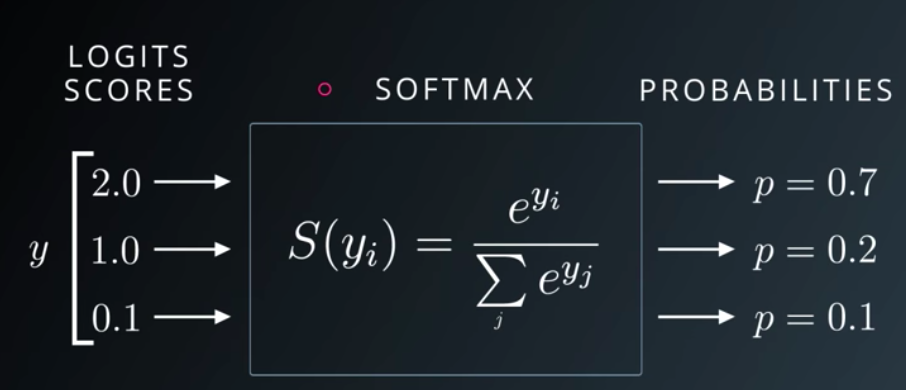

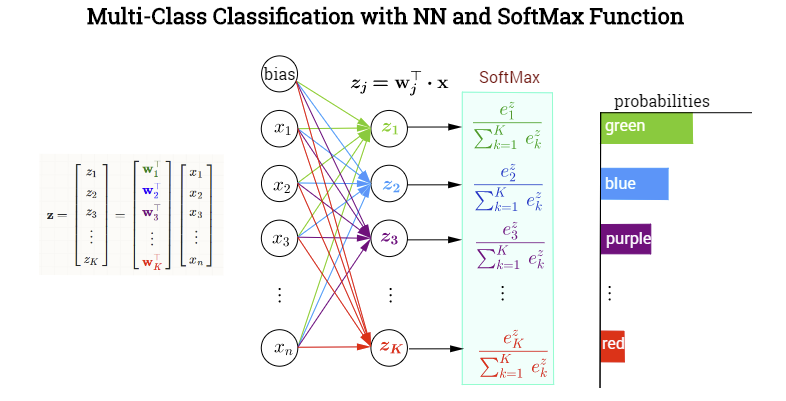